# Handwritten Digit Alphabets with Tensorflow NN

In [81]:
import cv2 as cv
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [55]:
# Define the path to the CSV file taht contain the dataset
csv_path = 'dataset/A_Z Handwritten Data.csv'

In [61]:
# Load the dataset into a DataFrame
df = pd.read_csv(csv_path)

In [62]:
# Display the first few rows of the dataset
df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
# X contains all the data from the DataFrame except the first column, which holds the labels.
# This means X will have the pixel values of the images.
# y contains only the first column of the DataFrame, which holds the labels for each image.
# df.iloc[rows, columns] is used to select data based on index positions.
X = df.iloc[:, 1:].values  
y = df.iloc[:, 0].values

In [64]:
# Reshape X to have the shape (num_images, 28, 28), where -1 means automatically infer the number of images.
# Each image is reshaped from a flat vector of 784 pixels to a 28x28 pixel grid.
X_images = X.reshape(-1, 28, 28)  

In [66]:
X_images.shape

(372450, 28, 28)

# Image Visualization

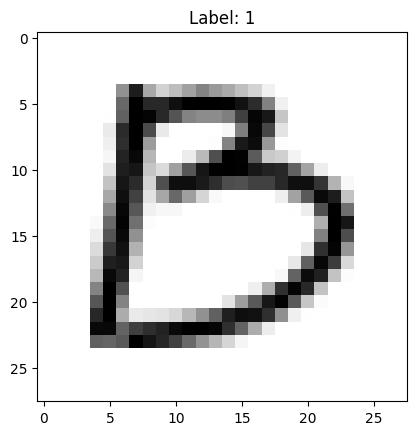

In [76]:
import matplotlib.pyplot as plt
image_index = 20000
# Invert the colors
X_images_inverted = 255 - X_images
# Visualize a sample 
plt.imshow(X_images_inverted[image_index], cmap='gray')
plt.title(f'Label: {y[image_index]}')
plt.show()

# Pre-Processing

In [78]:
# Normalize the images, adjusting pixel values to a range [0, 1]
X_images_normalized = tf.keras.utils.normalize(X_images_inverted, axis=1)

In [82]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_images_normalized, y, test_size=0.2, random_state=42)

In [83]:
# Print shapes to verify the split
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (297960, 28, 28)
X_test shape: (74490, 28, 28)
y_train shape: (297960,)
y_test shape: (74490,)


# Model

In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
# input layer, three dense layer and one output layer
model = Sequential([
    Input(shape=(28, 28)),            # Input layer specifying the shape of the input
    Flatten(),                        # Flatten the 28x28 input to a 784-dimensional vector
    Dense(1024, activation='relu'),   # First hidden layer with 1024 units and ReLU activation
    Dense(512, activation='relu'),    # Second hidden layer with 512 units and ReLU activation
    Dense(128, activation='relu'),    # Third hidden layer with 128 units and ReLU activation
    # Output layer with 26 neurons and softmax activation for multi-class classification
    Dense(26, activation='softmax')    
])

In [88]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [89]:
# train our model on the training set with 10 epochs it means just how many times our model gonna see the data
# Further split X_train into training and validation sets
history = model.fit(
    X_train,             # Training features
    y_train,             # Training labels
    epochs=10,           # Number of epochs to train the model
    batch_size=32,       # Number of samples per gradient update
    validation_split=0.10 # Reserve 10% of the training data for validation
)

Epoch 1/10
8381/8381 ━━━━━━━━━━━━━━━━━━━━ 106s 13ms/step - accuracy: 0.7848 - loss: 0.7281 - val_accuracy: 0.9252 - val_loss: 0.2522
Epoch 2/10
8381/8381 ━━━━━━━━━━━━━━━━━━━━ 109s 13ms/step - accuracy: 0.9369 - loss: 0.2115 - val_accuracy: 0.9530 - val_loss: 0.1607
Epoch 3/10
8381/8381 ━━━━━━━━━━━━━━━━━━━━ 112s 13ms/step - accuracy: 0.9530 - loss: 0.1586 - val_accuracy: 0.9453 - val_loss: 0.1792
Epoch 4/10
8381/8381 ━━━━━━━━━━━━━━━━━━━━ 117s 14ms/step - accuracy: 0.9592 - loss: 0.1360 - val_accuracy: 0.9595 - val_loss: 0.1392
Epoch 5/10
8381/8381 ━━━━━━━━━━━━━━━━━━━━ 116s 14ms/step - accuracy: 0.9635 - loss: 0.1195 - val_accuracy: 0.9608 - val_loss: 0.1315
Epoch 6/10
8381/8381 ━━━━━━━━━━━━━━━━━━━━ 117s 14ms/step - accuracy: 0.9679 - loss: 0.1056 - val_accuracy: 0.9677 - val_loss: 0.1104
Epoch 7/10
8381/8381 ━━━━━━━━━━━━━━━━━━━━ 105s 13ms/step - accuracy: 0.9700 - loss: 0.0971 - val_accuracy: 0.9682 - val_loss: 0.1081
Epoch 8/10
8381/8381 ━━━━━━━━━━━━━━━━━━━━ 112s 13ms/step - accuracy: 

# Testing the model

In [90]:
# seing how our model doing on the training set
loss_t, accuracy_t = model.evaluate(X_train, y_train)
# printing the accuracy and the loss of the training set
print("Accuracy: " + str(accuracy_t) + "    Loss: " + str(loss_t))

9312/9312 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9775 - loss: 0.0719
Accuracy: 0.9763223528862    Loss: 0.07635299116373062


In [91]:
# seing how our model doing on the test set
loss, accuracy = model.evaluate(X_test, y_test)
# printing the accuracy and the loss of the test set
print("Accuracy: " + str(accuracy) + "    Loss: " + str(loss))

2328/2328 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9690 - loss: 0.1081
Accuracy: 0.9696469306945801    Loss: 0.10718393325805664


In [92]:
# saving the model
model.save("handwritten_alphabets.keras")